## Part 1 ‐ Exploratory data analysis

The logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 

Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 

Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

### 1. Load logins json file

In [109]:
import pandas as pd
import json
from pandas.io.json import json_normalize

# load json as string
login_data = json.load((open('logins.json')))
#print(type(login_data))
login_data['login_time'][:5]

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21']

In [111]:
login_df = pd.read_json('logins.json')
login_df['value'] = 1
display(login_df.head())
print(login_df.shape)
print(type(login_df['login_time']))

,login_time,value
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


(93142, 2)
<class 'pandas.core.series.Series'>


In [117]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time    93142 non-null datetime64[ns]
value         93142 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


### 2. Aggregate Login time counts within every 15 minute time intervals

In [5]:
from itertools import groupby
from datetime import datetime, timedelta

def get_key(d):
# group by 15 minutes
    k = d + timedelta(minutes=-(d.minute % 15))
    return datetime(k.year, k.month, k.day, k.hour, k.minute, 0)

In [76]:
g = groupby(sorted(login_df['login_time']), key=get_key)
aggregateTimeIntervalList = []
aggregated_len = []
#test=groupby(sorted(login_df['login_time'][:10]), key=get_key)
#test
#sorted(login_df['login_time'][:10])
for key, group in g: 
    length = len(list(group))
    #print(key, list(group), type(list(group)), length)
    aggregateTimeIntervalList.append(str(key))
    aggregated_len.append(length)
print(aggregated_len[:20])
print(aggregateTimeIntervalList[:20])

[2, 6, 9, 7, 1, 4, 4, 9, 8, 1, 3, 16, 13, 14, 15, 10, 18, 12, 13, 9]
['1970-01-01 20:00:00', '1970-01-01 20:15:00', '1970-01-01 20:30:00', '1970-01-01 20:45:00', '1970-01-01 21:00:00', '1970-01-01 21:15:00', '1970-01-01 21:45:00', '1970-01-01 22:00:00', '1970-01-01 22:15:00', '1970-01-01 22:30:00', '1970-01-01 22:45:00', '1970-01-01 23:00:00', '1970-01-01 23:15:00', '1970-01-01 23:30:00', '1970-01-01 23:45:00', '1970-01-02 00:00:00', '1970-01-02 00:15:00', '1970-01-02 00:30:00', '1970-01-02 00:45:00', '1970-01-02 01:00:00']


In [85]:
#sample code:
#test=groupby(sorted(login_df['login_time'][:10]), key=get_key)
#aggregateTimeIntervalList = []
#for key, group in test:
    #tempList = []
    #count = 0
    #for item in group:
        #item = item.strftime("%Y-%m-%d %H:%M:%S")
        #print(item, type(item))
        #timerequiredSeries = (login_df[login_df['login_time'].str.contains(item, regex=False, na=False)]['value']).tolist()
        #for val in timerequiredSeries:
            #count += val
            #tempList.append(count)
            #tempList.append(key)
            #aggregateTimeIntervalList.append(tempList)
            #print("Done")

In [97]:
series = pd.DataFrame(aggregateTimeIntervalList)
#print(series.columns)
series = series.rename(columns={0:'Time_Intervals'})
#series.head()
series['counts'] = pd.Series(aggregated_len)
display(series.head())
print(series.shape)
display(series.tail())

,Time_Intervals,counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


(9381, 2)


,Time_Intervals,counts
9376,1970-04-13 17:45:00,5
9377,1970-04-13 18:00:00,5
9378,1970-04-13 18:15:00,2
9379,1970-04-13 18:30:00,7
9380,1970-04-13 18:45:00,6


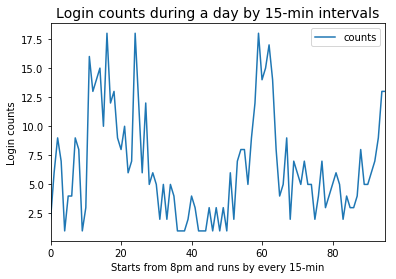

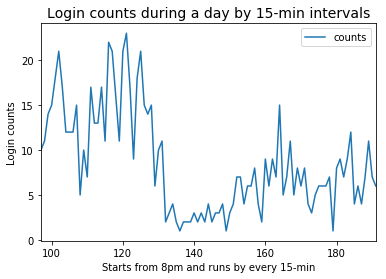

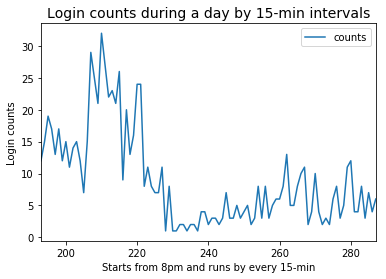

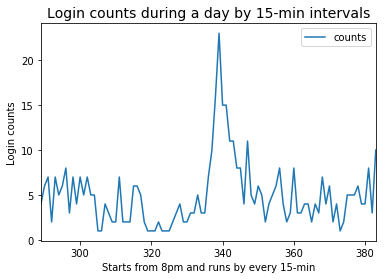

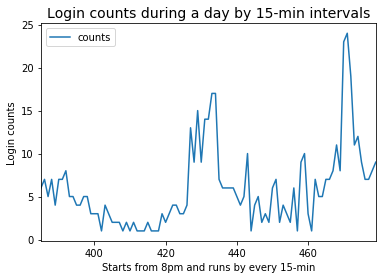

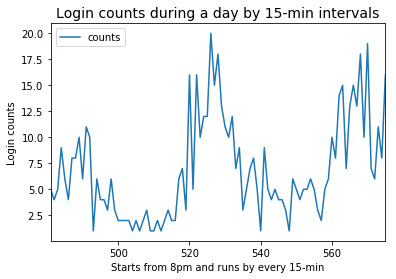

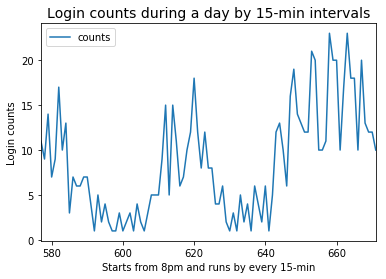

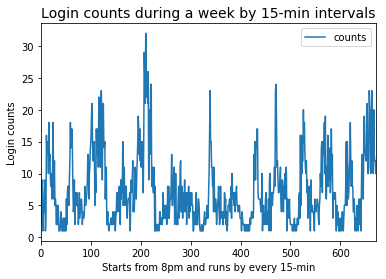

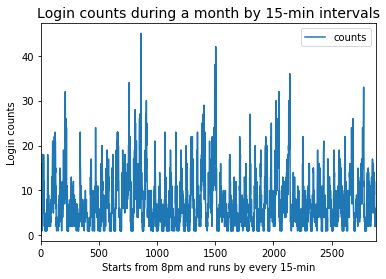

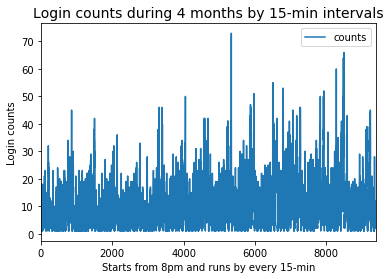

In [115]:
import matplotlib.pyplot as plt
series[:96].plot()
plt.ylabel('Login counts')
plt.xlabel('Starts from 8pm and runs by every 15-min')
plt.title('Login counts during a day by 15-min intervals',fontsize=14)
for i in range(6):
    series[(96*(i+1)+1):96*(i+2)].plot()
    plt.ylabel('Login counts')
    plt.xlabel('Starts from 8pm and runs by every 15-min')
    plt.title('Login counts during a day by 15-min intervals',fontsize=14)
series[:96*7].plot()
plt.ylabel('Login counts')
plt.xlabel('Starts from 8pm and runs by every 15-min')
plt.title('Login counts during a week by 15-min intervals',fontsize=14)
series[:96*30].plot()
plt.ylabel('Login counts')
plt.xlabel('Starts from 8pm and runs by every 15-min')
plt.title('Login counts during a month by 15-min intervals',fontsize=14)
series.plot()
plt.ylabel('Login counts')
plt.xlabel('Starts from 8pm and runs by every 15-min')
plt.title('Login counts during 4 months by 15-min intervals',fontsize=14)
plt.show()

### Observations from the graphs:

From the Login counts per day graph we can observe 2 peak login times during weekdays, one is around 5pm to 8pm in the evenings, the other is around 8am in the morning. As it gets closer to weekends, such as Friday, Saturday and Sunday, the peak time shifts approximately to 10am~1pm during the day, and 10pm to 1am during the night. 

The pattern seen from the login counts per week graph is that Saturday login counts are generally higher than weekdays and Sundays, and the pattern is repeated every week.


## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1.What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2.Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a.how you will implement the experiment
b.what statistical test(s) you will conduct to verify the significance of the observation
c.how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Answers 1. 
Key measure of success can be chosen as average weekly total number of toll road pass through counts between the 2 target cities. The experiment will take a total of consecutive 4 weeks in a normal calendar month. This is because we actually see a repetitive pattern of logins per week, and similarly per month. But there may still be some count variations for different weeks (1,2,3,4) during the same month, it makes more sense to look at the average weekly counts to stablize the week by week count variations.

### Answers 2. 
Suppose the experiment will begin on March 1st and last till March 31st. At the beginning of Feburary, we will randomly select 50% of the drivers and send them notifications that their toll bridge fees will be reimbursed if they travel between the 2 target cities during the month of March. This is our test group drivers. The other 50% of the drivers will not receive any notification and thus considered as the control group. 

This experiment assumes the randomly selected 50% drivers that we sent emails to, do open the emails and are aware of the reimbursement in March. It also assumes the driver behavior in the test and control group are similar, which means drivers in either the test or control group are not particularly active / inactive in traveling across 2 cities. 

We will record the total number of pass through counts during each week in March, for both the test and control group drivers. The data will look like this: 

Test group: week1 counts T1, week2 counts T2, week3 counts T3, week4 counts T4

Control group: week1 counts C1, week2 counts C2, week3 counts C3, week4 counts C4

We will take the average of T1 through T4 (call it Tbar) and C1 through C4 (call it Cbar) and compare the differences between these 2 average numbers. Our null hypothesis is that there is no difference between the true values of these 2 group means. Alternative hypothesis is that the true group mean in test group is > the true group mean in the control group. This is a one sided 2 sample T-test. We assume that weekly total counts are identically independently normally distributed within the test group and within the control group. Using 0.05 as significance level, and use the t-test formula to calculate the t-statistics will yield the conclusion whether we should reject the null hypothesis or not.

If it turns out that we should reject the null hypothesis, it would indicate that reimbursing the toll costs is effective in encouraging drivers to travel and serve between the 2 cities. Otherwise we conclude reimbursing toll costs is not going to bring in higher travel volumes between the 2 cities. 

## Part 3 ‐ Predictive modeling

The ultimate data contains a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

1.Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained? 

2.Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3.Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

### Load Ultimate data

In [186]:
ultimate_data = json.load((open('ultimate_data_challenge.json')))
ultimate_data_df = pd.DataFrame(ultimate_data)
display(ultimate_data_df.head())
print(ultimate_data_df.shape)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


(50000, 12)


### 1. Data Exploration

The dataset has 12 variables and 50000 rows. 2 numeric variables have missing values and 1 categorical variable "phone" has missing values. variable "last_trip_date" tells what date is the last date the user completed a trip, and per definition of retained (we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days), we need to define a new column called "retained" in the dataset using the logic that if the last trip date was between 2014-06-01 and 2014-07-01, then "retained = Y (1)", otherwise "retained = N (0)".

In [118]:
ultimate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [119]:
ultimate_data_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [179]:
ultimate_data_df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [177]:
ultimate_data_df.phone.value_counts(normalize=True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

In [126]:
ultimate_data_df.ultimate_black_user.value_counts(normalize=True)

False    0.62292
True     0.37708
Name: ultimate_black_user, dtype: float64

In [133]:
print("Earliest last trip date: ", ultimate_data_df.last_trip_date.sort_values().min())
print("Latest last trip date: ", ultimate_data_df.last_trip_date.sort_values().max())

Earliest last trip date:  2014-01-01
Latest last trip date:  2014-07-01


In [172]:
print("Earliest Sign up date: ", ultimate_data_df.signup_date.sort_values().min())
print("Latest Sign up date: ", ultimate_data_df.signup_date.sort_values().max())

Earliest Sign up date:  2014-01-01
Latest Sign up date:  2014-01-31


### Convert last trip date to numeric and define those happened between 2014-06-01 and 2014-07-01 as retained = 1, else retained = 0. 

In [164]:
retain = []
for i in range(50000):
    if int(ultimate_data_df.last_trip_date.values[i][6]) >= 6:
        retain.append(1)
    else:
        retain.append(0)

In [165]:
retain = pd.Series(retain)

In [187]:
ultimate_data_df['retained'] = retain

In [188]:
ultimate_data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


### Percentage of retained users in their 6th month on the system is 37.6%

In [189]:
print("% of retained users in their 6th month on the system: ")
ultimate_data_df.retained.value_counts(normalize=True)

% of retained users in their 6th month on the system: 


0    0.62392
1    0.37608
Name: retained, dtype: float64

### Check the relationship between variable "retained" and "ultimate_black_user". Looks like these 2 variables match in most records, only on a small portion of the records they disagree.

In [215]:
tmp = pd.crosstab(ultimate_data_df['ultimate_black_user'], ultimate_data_df['retained'])
tmp

retained,0,1
ultimate_black_user,,
False,21839,9307
True,9357,9497


### Impute missing values using median for the 2 numeric variables, and impute missing values in "phone" using majority class.

In [190]:
ultimate_data_df['avg_rating_by_driver'] = ultimate_data_df['avg_rating_by_driver'].fillna(ultimate_data_df['avg_rating_by_driver'].median())

In [191]:
ultimate_data_df['avg_rating_of_driver'] = ultimate_data_df['avg_rating_of_driver'].fillna(ultimate_data_df['avg_rating_of_driver'].median())

In [192]:
ultimate_data_df['phone'] = ultimate_data_df['phone'].fillna('iPhone')

In [193]:
ultimate_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null int64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 4.6+ MB


In [195]:
ultimate_data_df.phone.value_counts(normalize=True)

iPhone     0.69956
Android    0.30044
Name: phone, dtype: float64

### Visualize distributions of some numeric variables in the dataset

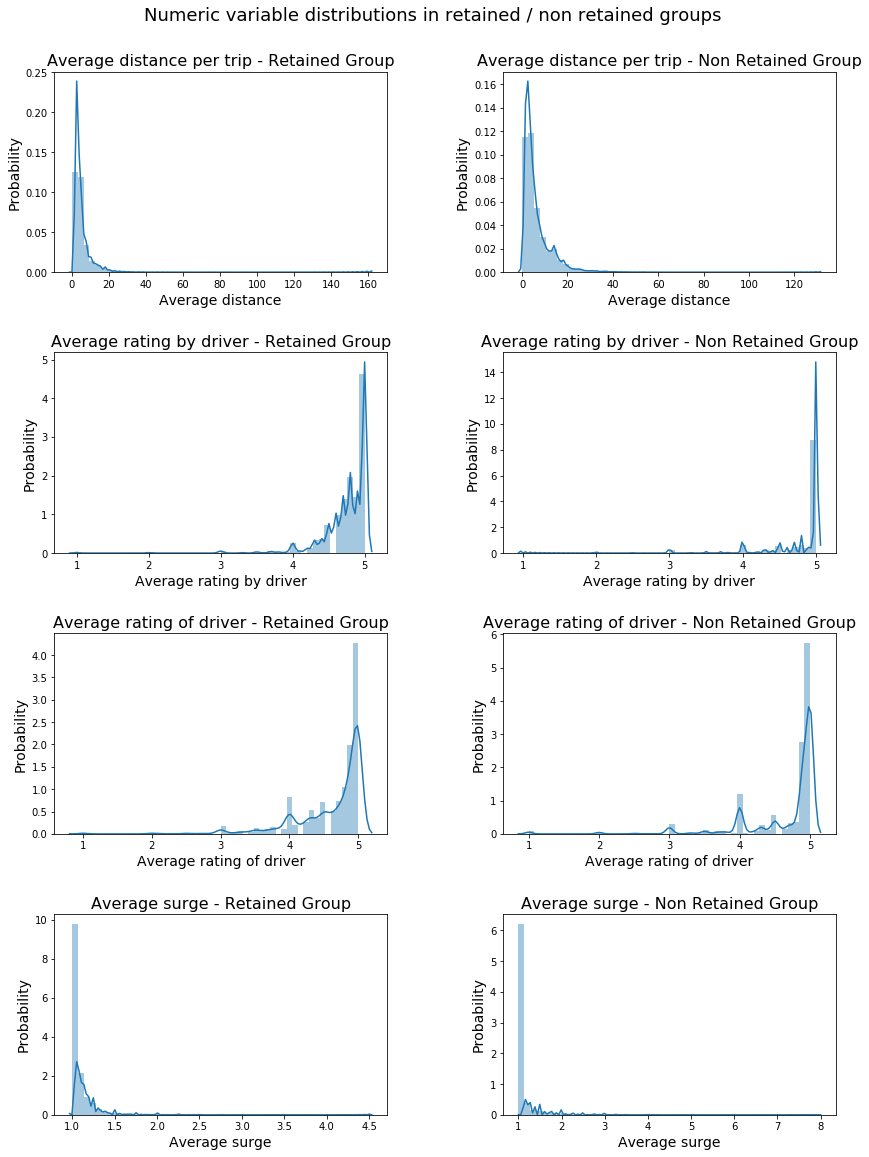

In [204]:
import seaborn as sns

plt.figure(figsize=(14,18))
plt.suptitle('Numeric variable distributions in retained / non retained groups', fontsize=18)

plt.subplot(421)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['avg_dist'])
g.set_title("Average distance per trip - Retained Group", fontsize=16)
g.set_xlabel("Average distance", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(422)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['avg_dist'])
g1.set_title("Average distance per trip - Non Retained Group", fontsize=16)
g1.set_xlabel("Average distance", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplot(423)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['avg_rating_by_driver'])
g.set_title("Average rating by driver - Retained Group", fontsize=16)
g.set_xlabel("Average rating by driver", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(424)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['avg_rating_by_driver'])
g1.set_title("Average rating by driver - Non Retained Group", fontsize=16)
g1.set_xlabel("Average rating by driver", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplot(425)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['avg_rating_of_driver'])
g.set_title("Average rating of driver - Retained Group", fontsize=16)
g.set_xlabel("Average rating of driver", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(426)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['avg_rating_of_driver'])
g1.set_title("Average rating of driver - Non Retained Group", fontsize=16)
g1.set_xlabel("Average rating of driver", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplot(427)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['avg_surge'])
g.set_title("Average surge - Retained Group", fontsize=16)
g.set_xlabel("Average surge", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(428)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['avg_surge'])
g1.set_title("Average surge - Non Retained Group", fontsize=16)
g1.set_xlabel("Average surge", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplots_adjust(hspace = 0.4, wspace = 0.35, top = 0.93)
plt.show()

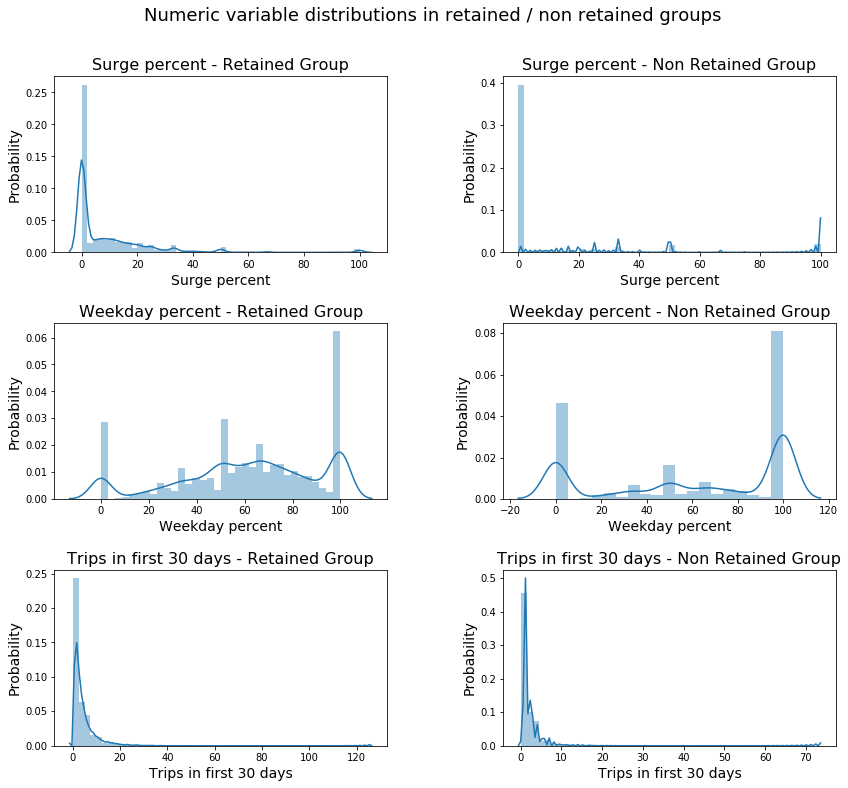

In [205]:
plt.figure(figsize=(14,12))
plt.suptitle('Numeric variable distributions in retained / non retained groups', fontsize=18)

plt.subplot(321)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['surge_pct'])
g.set_title("Surge percent - Retained Group", fontsize=16)
g.set_xlabel("Surge percent", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(322)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['surge_pct'])
g1.set_title("Surge percent - Non Retained Group", fontsize=16)
g1.set_xlabel("Surge percent", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplot(323)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['weekday_pct'])
g.set_title("Weekday percent - Retained Group", fontsize=16)
g.set_xlabel("Weekday percent", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(324)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['weekday_pct'])
g1.set_title("Weekday percent - Non Retained Group", fontsize=16)
g1.set_xlabel("Weekday percent", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplot(325)
g = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==1)]['trips_in_first_30_days'])
g.set_title("Trips in first 30 days - Retained Group", fontsize=16)
g.set_xlabel("Trips in first 30 days", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(326)
g1 = sns.distplot(ultimate_data_df[(ultimate_data_df['retained']==0)]['trips_in_first_30_days'])
g1.set_title("Trips in first 30 days - Non Retained Group", fontsize=16)
g1.set_xlabel("Trips in first 30 days", fontsize=14)
g1.set_ylabel("Probability", fontsize=14)

plt.subplots_adjust(hspace = 0.4, wspace = 0.35, top = 0.9)
plt.show()

### Check correlations of some numeric variables in the dataset

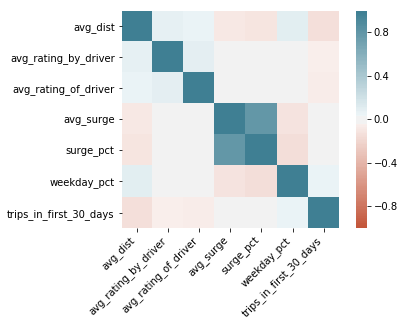

In [218]:
tt = ultimate_data_df[['avg_dist','avg_rating_by_driver','avg_rating_of_driver',
                'avg_surge','surge_pct','weekday_pct','trips_in_first_30_days']]
corr = tt.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

### Visualize distributions of some categorical variables in the dataset

retained            city  Non Retained   Retained
0                Astapor     74.428450  25.571550
1         King's Landing     37.186575  62.813425
2             Winterfell     64.805451  35.194549


(0, 65.37681497623358)

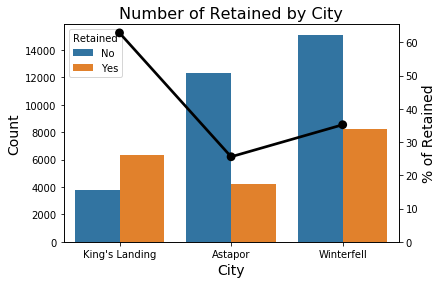

In [212]:
tmp = pd.crosstab(ultimate_data_df['city'], ultimate_data_df['retained'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'Non Retained', 1:'Retained'}, inplace=True)
print(tmp)

g = sns.countplot(x='city', data=ultimate_data_df, hue='retained')
g.set_title("Number of Retained by City", fontsize=16)
g.set_xlabel("City", fontsize=14)
g.set_ylabel('Count', fontsize=14)
plt.legend(title='Retained', loc='best', labels=['No', 'Yes'])
gt = g.twinx()
gt = sns.pointplot(x='city', y='Retained', data=tmp, color='black', order=["King's Landing",'Astapor','Winterfell'], legend=False)
gt.set_ylabel("% of Retained", fontsize=14)
gt.set_ylim(0,)

retained    phone  Non Retained   Retained
0         Android     79.057383  20.942617
1          iPhone     55.234719  44.765281


(0, 46.405014914569406)

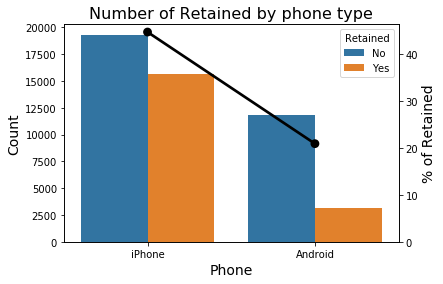

In [211]:
tmp = pd.crosstab(ultimate_data_df['phone'], ultimate_data_df['retained'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'Non Retained', 1:'Retained'}, inplace=True)
print(tmp)

g = sns.countplot(x='phone', data=ultimate_data_df, hue='retained')
g.set_title("Number of Retained by phone type", fontsize=16)
g.set_xlabel("Phone", fontsize=14)
g.set_ylabel('Count', fontsize=14)
plt.legend(title='Retained', loc='best', labels=['No', 'Yes'])
gt = g.twinx()
gt = sns.pointplot(x='phone', y='Retained', data=tmp, color='black', order=['iPhone','Android'], legend=False)
gt.set_ylabel("% of Retained", fontsize=14)
gt.set_ylim(0,)

retained  ultimate_black_user  Non Retained   Retained
0                       False     70.118153  29.881847
1                        True     49.628726  50.371274


Text(0, 0.5, '% of Retained')

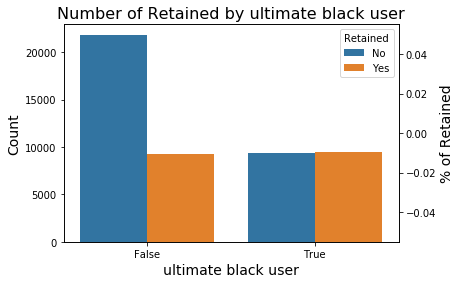

In [219]:
tmp = pd.crosstab(ultimate_data_df['ultimate_black_user'], ultimate_data_df['retained'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'Non Retained', 1:'Retained'}, inplace=True)
print(tmp)

g = sns.countplot(x='ultimate_black_user', data=ultimate_data_df, hue='retained')
g.set_title("Number of Retained by ultimate black user", fontsize=16)
g.set_xlabel("ultimate black user", fontsize=14)
g.set_ylabel('Count', fontsize=14)
plt.legend(title='Retained', loc='best', labels=['No', 'Yes'])
gt = g.twinx()
gt = sns.pointplot(x='ultimate_black_user', y='Retained', data=tmp, color='black', order=['False','True'], legend=False)
gt.set_ylabel("% of Retained", fontsize=14)
gt.set_ylim(0,)

### Use one-hot encoding to transform 3 categorical variables (city, phone, ultimate_black_user) and prepare the final columns for modeling. Note that I will drop sign up dates and last trip dates from the datasets as they are all signed up within the same month, and last trip dates is already used in defining target variable.

In [221]:
droplist = ['signup_date','last_trip_date']
ultimate_data_df.drop(droplist, axis=1, inplace=True)

In [222]:
ultimate_data_df = pd.get_dummies(ultimate_data_df, columns=['city','phone'])

In [223]:
ultimate_data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,1,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,0,1,1,0


In [224]:
ultimate_data_df = pd.get_dummies(ultimate_data_df, columns=['ultimate_black_user'])
ultimate_data_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,0,1,1,0,1,0


### 2. Predictive model

I will use Logistic Regression, Random Forest and Xgboost to fit a 2-class classification model and compare the model performances. I'll use original scales of the columns.

In [229]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from xgboost.sklearn import XGBClassifier
#from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split

In [236]:
# train test split using test_size = 0.2 
X = ultimate_data_df.drop('retained',axis=1)
y = ultimate_data_df['retained']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)
print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 14) (50000,) (40000, 14) (40000,) (10000, 14) (10000,)


In [237]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=123, shuffle=True)
kf.get_n_splits(X_train)

i = 1
for train_index, val_index in kf.split(X_train):
    print(f"Fold {i}: ", "Train:", train_index, "Validation:", val_index)
    i = i + 1

Fold 1:  Train: [    0     2     3 ... 39996 39997 39999] Validation: [    1    15    19 ... 39988 39994 39998]
Fold 2:  Train: [    0     1     2 ... 39997 39998 39999] Validation: [    8    12    21 ... 39966 39989 39995]
Fold 3:  Train: [    0     1     2 ... 39997 39998 39999] Validation: [    3     9    10 ... 39991 39992 39993]
Fold 4:  Train: [    0     1     3 ... 39996 39997 39998] Validation: [    2     5     6 ... 39986 39990 39999]
Fold 5:  Train: [    1     2     3 ... 39995 39998 39999] Validation: [    0     4    13 ... 39978 39996 39997]


### Random Forest

In [238]:
import time
start = time.process_time()

niter, verbose, random_state = [5, 0, 123] 
param_space = {'n_estimators': range(100,500,100), 'max_depth': range(1,10)} 

clf = RandomForestClassifier(random_state=random_state)
cv_clf = RandomizedSearchCV(clf, param_space, cv=kf, n_iter=niter, scoring='roc_auc', return_train_score=True, 
                            verbose=verbose, n_jobs=-1) 
cv_clf.fit(X_train, y_train)

print('completed in {} s'.format(time.process_time() - start))

completed in 7.89272600000001 s


In [242]:
candidate_params = cv_clf.cv_results_['params']
print("1. Five candidate parameters are: ", candidate_params)
best_n = cv_clf.best_params_['n_estimators']
best_d = cv_clf.best_params_['max_depth']
print("2. Best number of trees and depth are: {} and {}".format(best_n, best_d))
best_score = cv_clf.best_score_
print("3. Best average CV validation score is: ", best_score)
std_of_best_score = cv_clf.cv_results_['std_test_score'][max(enumerate(cv_clf.cv_results_['mean_test_score']),key=(lambda x: x[1]))[0]]
print("4. Standard Deviation of Best average CV validation score is: ", std_of_best_score)
mean_test_score = cv_clf.cv_results_['mean_test_score']
print("5. Average CV validation score: ", mean_test_score)
std_test_score = cv_clf.cv_results_['std_test_score']
print("6. Standard Deviation of CV validation score: ", std_test_score)
mean_train_score = cv_clf.cv_results_['mean_train_score']
print("7. Average CV training score: ", mean_train_score)
std_train_score = cv_clf.cv_results_['std_train_score']
print("8. Standard Deviation of CV training score: ", std_train_score)

print("1st fold validation score: ", cv_clf.cv_results_['split0_test_score'])
print("2nd fold validation score: ", cv_clf.cv_results_['split1_test_score'])
print("3rd fold validation score: ", cv_clf.cv_results_['split2_test_score'])
print("4th fold validation score: ", cv_clf.cv_results_['split3_test_score'])
print("5th fold validation score: ", cv_clf.cv_results_['split4_test_score'])
print("1st fold training score: ", cv_clf.cv_results_['split0_train_score'])
print("2nd fold training score: ", cv_clf.cv_results_['split1_train_score'])
print("3rd fold training score: ", cv_clf.cv_results_['split2_train_score'])
print("4th fold training score: ", cv_clf.cv_results_['split3_train_score'])
print("5th fold training score: ", cv_clf.cv_results_['split4_train_score'])

1. Five candidate parameters are:  [{'n_estimators': 200, 'max_depth': 4}, {'n_estimators': 400, 'max_depth': 5}, {'n_estimators': 200, 'max_depth': 1}, {'n_estimators': 200, 'max_depth': 8}, {'n_estimators': 400, 'max_depth': 3}]
2. Best number of trees and depth are: 200 and 8
3. Best average CV validation score is:  0.8464399691773605
4. Standard Deviation of Best average CV validation score is:  0.0013078322769084466
5. Average CV validation score:  [0.82847547 0.83451144 0.77827054 0.84643997 0.81812959]
6. Standard Deviation of CV validation score:  [0.00273436 0.00189893 0.00502935 0.00130783 0.0036493 ]
7. Average CV training score:  [0.82966089 0.83691734 0.77844439 0.86109722 0.81880357]
8. Standard Deviation of CV training score:  [0.00038573 0.00046939 0.00106061 0.00067222 0.00034351]
1st fold validation score:  [0.82899523 0.83453855 0.78127677 0.84657517 0.81995981]
2nd fold validation score:  [0.82688452 0.83378949 0.77535039 0.84746772 0.81581193]
3rd fold validation s

### Summary: Random Forest: Using AUC as criteria, the best average CV score achieved is 0.8464

### Xgboost

In [254]:
import time
start = time.process_time()

niter, verbose, random_state = [5, 0, 123] 
param_space = {'n_estimators': range(100,500,100), 'learning_rate': [0.01,0.1,0.5], 
               'max_depth': range(1,10), 'gamma': [0.001,0.01,1,10]}
               
clf = XGBClassifier(objective='binary:logistic', verbosity=verbose, booster='gbtree', tree_method='auto', 
                            subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, 
                            reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=random_state)
cv_clf = RandomizedSearchCV(clf, param_space, cv=kf, n_iter=niter, scoring='roc_auc', return_train_score=True, 
                            verbose=verbose, n_jobs=-1)
cv_clf.fit(X_train, y_train)

print('completed in {} s'.format(time.process_time() - start))

completed in 66.99333200000001 s


In [258]:
candidate_params = cv_clf.cv_results_['params']
print("1. Five candidate parameters are: ", candidate_params)
best_n = cv_clf.best_params_['n_estimators']
best_d = cv_clf.best_params_['max_depth']
best_lr = cv_clf.best_params_['learning_rate']
best_gamma = cv_clf.best_params_['gamma']
print("2. Best number of trees, depth, learning rate, gamma are: {} and {}".format(best_n, best_d, best_lr, best_gamma))
best_score = cv_clf.best_score_
print("3. Best average CV validation score is: ", best_score)
std_of_best_score = cv_clf.cv_results_['std_test_score'][max(enumerate(cv_clf.cv_results_['mean_test_score']),key=(lambda x: x[1]))[0]]
print("4. Standard Deviation of Best average CV validation score is: ", std_of_best_score)
mean_test_score = cv_clf.cv_results_['mean_test_score']
print("5. Average CV validation score: ", mean_test_score)
std_test_score = cv_clf.cv_results_['std_test_score']
print("6. Standard Deviation of CV validation score: ", std_test_score)
mean_train_score = cv_clf.cv_results_['mean_train_score']
print("7. Average CV training score: ", mean_train_score)
std_train_score = cv_clf.cv_results_['std_train_score']
print("8. Standard Deviation of CV training score: ", std_train_score)

print("1st fold validation score: ", cv_clf.cv_results_['split0_test_score'])
print("2nd fold validation score: ", cv_clf.cv_results_['split1_test_score'])
print("3rd fold validation score: ", cv_clf.cv_results_['split2_test_score'])
print("4th fold validation score: ", cv_clf.cv_results_['split3_test_score'])
print("5th fold validation score: ", cv_clf.cv_results_['split4_test_score'])
print("1st fold training score: ", cv_clf.cv_results_['split0_train_score'])
print("2nd fold training score: ", cv_clf.cv_results_['split1_train_score'])
print("3rd fold training score: ", cv_clf.cv_results_['split2_train_score'])
print("4th fold training score: ", cv_clf.cv_results_['split3_train_score'])
print("5th fold training score: ", cv_clf.cv_results_['split4_train_score'])

1. Five candidate parameters are:  [{'n_estimators': 400, 'max_depth': 1, 'learning_rate': 0.1, 'gamma': 0.001}, {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.5, 'gamma': 10}, {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 1}, {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 10}, {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 10}]
2. Best number of trees, depth, learning rate, gamma are: 300 and 9
3. Best average CV validation score is:  0.8565331935165589
4. Standard Deviation of Best average CV validation score is:  0.0016103814645135146
5. Average CV validation score:  [0.84503718 0.85150402 0.83741395 0.85653319 0.84435643]
6. Standard Deviation of CV validation score:  [0.00139618 0.00163259 0.00196736 0.00161038 0.00080431]
7. Average CV training score:  [0.84606295 0.85514341 0.84133114 0.87133301 0.85169681]
8. Standard Deviation of CV training score:  [0.00043696 0.0009042  0.00062726 0.00099457 0.001

### Summary: Xgboost: Using AUC as criteria, the best average CV score achieved is 0.8565

### Logistic Regression

In [251]:
import time
start = time.process_time()

niter, verbose, random_state = [5, 0, 123] 
param_space = {'penalty': ['l1','l2'], 'C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1, 10, 100]}
        
clf = LogisticRegression(random_state=random_state)
cv_clf = RandomizedSearchCV(clf, param_space, cv=kf, n_iter=niter, scoring='roc_auc', return_train_score=True, 
                            verbose=verbose, n_jobs = -1) 
cv_clf.fit(X_train, y_train)

print('completed in {} s'.format(time.process_time() - start))

/Users/lisalb168/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


completed in 1.10627199999999 s


In [252]:
candidate_params = cv_clf.cv_results_['params']
print("1. Five candidate parameters are: ", candidate_params)
best_n = cv_clf.best_params_['penalty']
best_d = cv_clf.best_params_['C']
print("2. Best number of trees and depth are: {} and {}".format(best_n, best_d))
best_score = cv_clf.best_score_
print("3. Best average CV validation score is: ", best_score)
std_of_best_score = cv_clf.cv_results_['std_test_score'][max(enumerate(cv_clf.cv_results_['mean_test_score']),key=(lambda x: x[1]))[0]]
print("4. Standard Deviation of Best average CV validation score is: ", std_of_best_score)
mean_test_score = cv_clf.cv_results_['mean_test_score']
print("5. Average CV validation score: ", mean_test_score)
std_test_score = cv_clf.cv_results_['std_test_score']
print("6. Standard Deviation of CV validation score: ", std_test_score)
mean_train_score = cv_clf.cv_results_['mean_train_score']
print("7. Average CV training score: ", mean_train_score)
std_train_score = cv_clf.cv_results_['std_train_score']
print("8. Standard Deviation of CV training score: ", std_train_score)

print("1st fold validation score: ", cv_clf.cv_results_['split0_test_score'])
print("2nd fold validation score: ", cv_clf.cv_results_['split1_test_score'])
print("3rd fold validation score: ", cv_clf.cv_results_['split2_test_score'])
print("4th fold validation score: ", cv_clf.cv_results_['split3_test_score'])
print("5th fold validation score: ", cv_clf.cv_results_['split4_test_score'])
print("1st fold training score: ", cv_clf.cv_results_['split0_train_score'])
print("2nd fold training score: ", cv_clf.cv_results_['split1_train_score'])
print("3rd fold training score: ", cv_clf.cv_results_['split2_train_score'])
print("4th fold training score: ", cv_clf.cv_results_['split3_train_score'])
print("5th fold training score: ", cv_clf.cv_results_['split4_train_score'])

1. Five candidate parameters are:  [{'penalty': 'l2', 'C': 1}, {'penalty': 'l2', 'C': 10}, {'penalty': 'l2', 'C': 0.001}, {'penalty': 'l2', 'C': 0.005}, {'penalty': 'l1', 'C': 0.005}]
2. Best number of trees and depth are: l2 and 10
3. Best average CV validation score is:  0.7610934212835032
4. Standard Deviation of Best average CV validation score is:  0.0036090005810056392
5. Average CV validation score:  [0.76109098 0.76109342 0.75961362 0.76104447 0.76048616]
6. Standard Deviation of CV validation score:  [0.00361098 0.003609   0.00321108 0.00346848 0.0032375 ]
7. Average CV training score:  [0.76136259 0.7613627  0.75989983 0.76129757 0.76073533]
8. Standard Deviation of CV training score:  [0.00086347 0.00086372 0.00081729 0.00084069 0.00085915]
1st fold validation score:  [0.75585394 0.75585515 0.75530628 0.75619711 0.75613963]
2nd fold validation score:  [0.76709055 0.76708654 0.76477636 0.76687515 0.76590079]
3rd fold validation score:  [0.75994226 0.75994804 0.75782201 0.7597

### Summary: Logistic Regression: Using AUC as criteria, the best average CV score achieved is 0.7611

### Conclusion: We will chose Xgboost as the final model due to its highest AUC among the 3 models we built. Visualize its feature importance chart on the training set and evaluate its performance on independent Test set.

In [259]:
clf = XGBClassifier(n_estimators = best_n, learning_rate = best_lr, max_depth = best_d, 
                            gamma = best_gamma, objective='binary:logistic', booster='gbtree', tree_method='auto', 
                            subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, 
                            reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, 
                            random_state = random_state)  

In [260]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=10, learning_rate=0.1,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=300, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, tree_method='auto', verbosity=1)

### The top 2 features selected are: driving rating and city. 

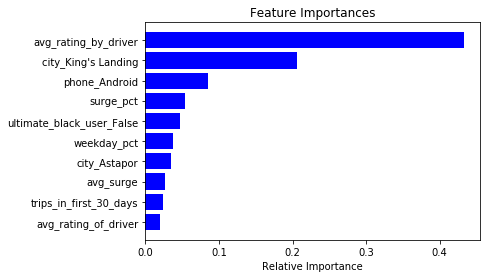

In [262]:
# plot the top M feature importances
import numpy as np
M = 10
importances = clf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(M), importances[indices][-M:], color='b', align='center')
plt.yticks(range(M), [features[i] for i in indices[-M:]])
plt.xlabel('Relative Importance')
plt.show()

### Confusion matrix, AUC and ROC for test dataset

In [264]:
import sklearn
preds = clf.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, preds, labels=None, sample_weight=None)
report = classification_report(y_test, preds)
probs = clf.predict_proba(X_test)
auc = roc_auc_score(y_test, probs[:,1])
accuracy = float(np.sum(preds==y_test))/y_test.shape[0] 

print("Confusion Matrix is: \n", confusion_matrix)
print("Classification Report: \n", report)
print("accuracy: %f" % (accuracy))
print("AUC: ", auc)

Confusion Matrix is: 
 [[5376  842]
 [1310 2472]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      6218
           1       0.75      0.65      0.70      3782

   micro avg       0.78      0.78      0.78     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.78      0.78      0.78     10000

accuracy: 0.784800
AUC:  0.8543437800799745


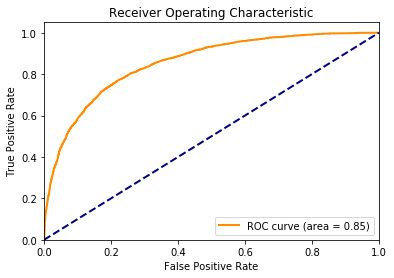

In [265]:
# plot ROC curve
y_score = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 3. Discussion - How Ultimate might leverage the insights gained from the model to improve its long term rider retention?

### Answers: 

The top 2 important features suggest driver rating and city are contributing most to retention. It make sense that if Ultimate Inc. can keep driver satisfaction as their top priority in their services and take all the measures they can to improve driver experience, then that will surely help retain customers. In addition, city is another factor that contributes to retention. It may be worthwhile to investigate things like if there are any competitors within certain cities that can easily cause drivers to switch to, or some other geographical conditions that may cause a difference in retention rate among different cities.